In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

Let's walk through how Ordinary Least Squares (OLS) regression works mathematically using the provided data:

```python
ages = np.array([20, 25, 30, 35, 40])
cigarettes_per_day = np.array([10, 15, 20, 25, 30])
```

1. **Define the model**: In simple linear regression, the model is represented as:

   $[ Y = \beta_0 + \beta_1 X + \epsilon ]$

   Where:
   - $ ( Y )$ is the dependent variable (cigarettes per day),
   - $ ( X )$ is the independent variable (ages),
   - $ ( \beta_0 )$ is the y-intercept (constant term),
   - $ ( \beta_1 )$ is the slope (coefficient of the independent variable),
   - $ ( \epsilon )$ is the error term.

2. **Calculate the mean of X and Y**:
   $[ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i ]$
    
   $[ \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i ]$

   For our data:
   
   $[ \bar{X} = \frac{20 + 25 + 30 + 35 + 40}{5} = 30 ]$
   
   $[ \bar{Y} = \frac{10 + 15 + 20 + 25 + 30}{5} = 20 ]$

3. **Calculate the slope (β1)**:

   $[ \beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} ]$

   Substituting the values:

   $[ \beta_1 = \frac{(20-30)(10-20) + (25-30)(15-20) + (30-30)(20-20) + (35-30)(25-20) + (40-30)(30-20)}{(20-30)^2 + (25-30)^2 + (30-30)^2 + (35-30)^2 + (40-30)^2} ]$

   Simplifying, we get:

   $[ \beta_1 = \frac{-100 + (-5)(-5) + 0 + 5(5) + 100}{100 + 25 + 0 + 25 + 100} = \frac{50}{125} = 0.4 ]$

4. **Calculate the y-intercept (β0)**:

   $[ \beta_0 = \bar{Y} - \beta_1 \bar{X} ]$

   Substituting the values:
   
   $[ \beta_0 = 20 - 0.4 \times 30 = 20 - 12 = 8 ]$

5. **Fit the regression line**:
   Now we have the estimated values of $( \beta_0 )$ and $( \beta_1 )$, so the regression line equation is:
   $[ \text{Cigarettes per day} = 0.4 \times \text{Age} + 8 ]$

   This line represents the best linear fit to the given data points.

<div class="width=80%">
In linear regression, there are several metrics commonly used to measure the error or goodness of fit of the model. Some of the most common ones include:

- Mean Absolute Error (MAE): The mean absolute error is the average of the absolute differences between the predicted values and the actual values. It provides a measure of the average magnitude of errors in the predictions.

- Mean Squared Error (MSE): The mean squared error is the average of the squared differences between the predicted values and the actual values. Squaring the errors penalizes larger errors more heavily than smaller ones.

- Root Mean Squared Error (RMSE): The root mean squared error is the square root of the mean squared error. It provides a measure of the average magnitude of errors in the same units as the dependent variable.

- R-squared (R2): R-squared represents the proportion of variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit.

These metrics can help assess the overall performance of the linear regression model and compare different models or variations of the same model. It's important to consider the specific context of the problem and the goals of the analysis when choosing which metric to use.
</div>

<div class="width=80%">

### Hypothesis Testing in Linear Regression

In the context of linear regression, hypothesis testing involves evaluating the statistical significance of the relationship between the independent variable(s) and the dependent variable. Specifically, it aims to determine whether the independent variable(s) have a significant effect on the dependent variable, and whether the coefficients estimated by the regression model are significantly different from zero.

#### Null Hypothesis $(H_0)$
The null hypothesis states that there is no significant relationship between the independent variable(s) and the dependent variable. Mathematically, it can be expressed as:

$[ H_0: \beta_1 = 0 ]$

where $( \beta_1 )$ is the coefficient (slope) associated with the independent variable of interest.

#### Alternative Hypothesis $(H_1)$
The alternative hypothesis contradicts the null hypothesis and asserts that there is a significant relationship between the independent variable(s) and the dependent variable. For a simple linear regression with one independent variable, the alternative hypothesis can be expressed as:

$[ H_1: \beta_1 \neq 0 ]$

This means that the coefficient $( \beta_1 )$ is not equal to zero, indicating that there is a linear relationship between the independent variable and the dependent variable.

During hypothesis testing in linear regression, we typically perform a t-test or F-test to assess the statistical significance of the coefficients. The p-value associated with these tests indicates the probability of observing the estimated coefficient (or more extreme values) if the null hypothesis were true. If the p-value is less than a predefined significance level (e.g., 0.05), we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is a significant relationship between the variables.

In summary, the null hypothesis represents the absence of a relationship, while the alternative hypothesis suggests the presence of a relationship between the independent and dependent variables in the linear regression model.

</div>

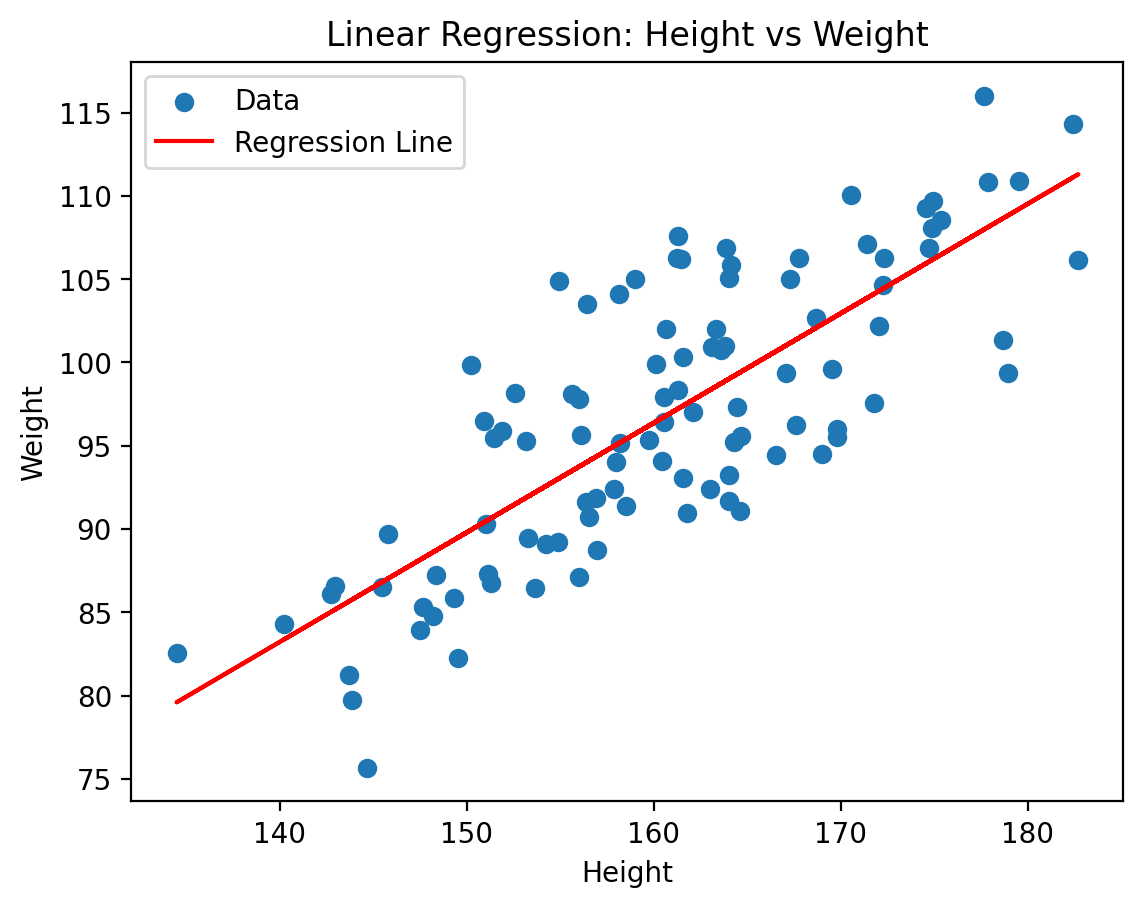

Slope (beta1): 0.6573492167731908
Intercept (beta0): -8.800109258447975
Sum of Squared Errors (SSE): 2642.9296354765725
Mean Absolute Error (MAE): 4.3296956925233845
Mean Squared Error (MSE): 26.429296354765725
Root Mean Squared Error (RMSE): 5.140943138643505


In [2]:
np.random.seed(0)
height = np.random.normal(loc=160, scale=10, size=100)  # Mean=160, Std=10
weight = 0.6 * height + np.random.normal(0, 5, 100)  # Linear relationship with some noise

# Calculate mean of height and weight
mean_height = np.mean(height)
mean_weight = np.mean(weight)

# Calculate slope (beta1)
numerator = np.sum((height - mean_height) * (weight - mean_weight))
denominator = np.sum((height - mean_height) ** 2)
beta1 = numerator / denominator

# Calculate intercept (beta0)
beta0 = mean_weight - beta1 * mean_height

y_hat = beta0 + beta1 * height

# Plot the data and the regression line
plt.scatter(height, weight, label="Data")
plt.plot(height, y_hat, color="red", label="Regression Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Linear Regression: Height vs Weight")
plt.legend()
plt.show()


# Print the calculated slope and intercept
print("Slope (beta1):", beta1)
print("Intercept (beta0):", beta0)

# Calculate the errors
errors = weight - y_hat

# Calculate the metrics
sse = np.sum(errors**2)
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

# Print the metrics
print("Sum of Squared Errors (SSE):", sse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
np.random.seed(1234)
num_samples = 100
ages = np.random.normal(loc=40, scale=10, size=num_samples).round(0)
cigarettes_per_day = np.random.poisson(lam=10, size=num_samples)
smoking_data = pd.DataFrame({"Ages": ages, "CigarettesPerDay": cigarettes_per_day})

# Perform linear regression
X = smoking_data["Ages"]
y = smoking_data["CigarettesPerDay"]
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
y_pred = model.predict(X)

print(model.summary())  # Print the summary of the model

# Plot the data and the regression line
plt.scatter(ages, cigarettes_per_day, label="Data")
plt.plot(ages, y_pred, color="red", label="OLS Regression Line")
plt.xlabel("Ages")
plt.ylabel("Cigarettes Per Day")
plt.title("Linear Regression: Age vs. Cigarettes Per Day")
plt.legend()
plt.show()